# My diet nutrition prediction

### Introduction

In my journey through the culinary realm over the past year, my passion for cooking has ignited a keen interest in understanding the nutritional content of my daily meals. Recognizing the profound impact of diet on overall well-being, I am driven to meticulously track and analyze the nutritional composition of my weekly culinary endeavors.

### Steps

1) Tracking Consumption: With meticulous attention to detail, I diligently recorded my weekly food intake, accounting for nuances such as ingredient substitutions and approximate measurements, ensuring a comprehensive representation of my dietary habits. 

2) Data analysis: Leveraging the robust nutrition information provided by the Swiss government, I accessed a comprehensive database encompassing a diverse array of food items, facilitating a detailed analysis of their nutritional profiles.

3) Analysis and Insights: Through a systematic exploration of these datasets, I aim to glean invaluable insights into the nutritional landscape of my current diet. By employing advanced analytical techniques, I endeavor to unravel patterns, identify deficiencies, and unearth opportunities for optimization, ultimately fostering informed decisions towards achieving dietary balance and vitality.



## Food Nutrition Data

In [1]:
import pandas as pd
import io
import requests

#get the file path
file_url = 'https://github.com/liyengL/DietNutrition/raw/main/Swiss_food_composition_database.xlsx'

#request the file
response = requests.get(file_url)

#read the excel file with the header being the second columm

food_nutrition = pd.read_excel(io.BytesIO(response.content),header=2)

#print the headers to verify the results
print(food_nutrition.head())



      ID  ID V 4.0  ID SwissFIR  \
0  10533       NaN          NaN   
1  10536       NaN          NaN   
2    273    4500.0     841005.0   
3  14113       NaN          NaN   
4  14131       NaN          NaN   

                                                Name Synonyms  \
0                                          Agar Agar      NaN   
1                                        Agave syrup      NaN   
2                                             Almond      NaN   
3                                Almond drink, plain      NaN   
4  Almond drink, plain, with calcium and vitamin ...      NaN   

                                   Category  Density              Matrix unit  \
0        Various/Gelling and binding agents      NaN  per 100g edible portion   
1               Sweets/Sugar and sweeteners      NaN  per 100g edible portion   
2          Nuts, seeds and oleaginous fruit      NaN  per 100g edible portion   
3  Milk and dairy products/Milk substitutes      1.0    per 100ml food vol

In [2]:
food_nutrition

,ID,ID V 4.0,ID SwissFIR,Name,Synonyms,Category,Density,Matrix unit,"Energy, kilojoules (kJ)",Derivation of value,...,Iodide (I) (µg),Derivation of value.37,Source.37,Zinc (Zn) (mg),Derivation of value.38,Source.38,Selenium (Se) (µg),Derivation of value.39,Source.39,Record has changed
0,10533,NaN,NaN,Agar Agar,NaN,Various/Gelling and binding agents,NaN,per 100g edible portion,641,Automated calculation,...,n.d.,NaN,NaN,1.5,-,1473,n.d.,NaN,NaN,No
1,10536,NaN,NaN,Agave syrup,NaN,Sweets/Sugar and sweeteners,NaN,per 100g edible portion,1240,Automated calculation,...,n.d.,NaN,NaN,n.d.,NaN,NaN,n.d.,NaN,NaN,No
2,273,4500.0,841005.0,Almond,NaN,"Nuts, seeds and oleaginous fruit",NaN,per 100g edible portion,2580,Automated calculation,...,0.2,-,2238,3.3,-,2238,2.2,-,2238,Yes
3,14113,NaN,NaN,"Almond drink, plain",NaN,Milk and dairy products/Milk substitutes,1.0,per 100ml food volume,139,Automated calculation,...,0.4,-,3200,0.1,-,2277;3200,0.2,-,3200,Yes
4,14131,NaN,NaN,"Almond drink, plain, with calcium and vitamin ...",NaN,Milk and dairy products/Milk substitutes,1.0,per 100ml food volume,139,Automated calculation,...,0.4,Estimation,NaN,0.1,Estimation,NaN,0.2,Estimation,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,1661,NaN,NaN,"Zucchini piccata, prepared",NaN,Prepared dishes/Other savoury dishes,NaN,per 100g edible portion,515,Automated calculation,...,11,Calculation on the basis of ingredients,NaN,0.7,Calculation on the basis of ingredients,NaN,n.d.,NaN,NaN,Yes
1105,1657,NaN,NaN,"Zucchini slices, breaded, prepared",NaN,Prepared dishes/Other savoury dishes,NaN,per 100g edible portion,530,Automated calculation,...,7.3,Calculation on the basis of ingredients,NaN,0.5,Calculation on the basis of ingredients,NaN,n.d.,NaN,NaN,Yes
1106,367,4370.0,1000830.0,"Zucchini, raw",NaN,Vegetables/Fresh vegetables,NaN,per 100g edible portion,80,Automated calculation,...,2.3,-,36,0.2,-,36,n.d.,NaN,NaN,No
1107,1654,NaN,NaN,"Zucchini, steamed (without addition of salt)",NaN,Vegetables/Cooked vegetables (incl. cans),NaN,per 100g edible portion,86,Automated calculation,...,2.5,Calculation on the basis of ingredients,NaN,0.3,Calculation on the basis of ingredients,NaN,n.d.,NaN,NaN,No


In [3]:
food_nutrition_headers = food_nutrition.columns
food_nutrition_headers

Index(['ID', 'ID V 4.0', 'ID SwissFIR', 'Name', 'Synonyms', 'Category',
       'Density', 'Matrix unit', 'Energy, kilojoules (kJ)',
       'Derivation of value',
       ...
       'Iodide (I) (µg)', 'Derivation of value.37', 'Source.37',
       'Zinc (Zn) (mg)', 'Derivation of value.38', 'Source.38',
       'Selenium (Se) (µg)', 'Derivation of value.39', 'Source.39',
       'Record has changed'],
      dtype='object', length=129)

In [4]:
# Find columns containing "Derivation of value" or "Source"
cols_to_drop = food_nutrition.columns[food_nutrition.columns.str.contains('Derivation of value|Source|Record')]

# Drop the identified columns
food_nutrition_cleaned = food_nutrition.drop(columns=cols_to_drop)

# Display the cleaned DataFrame
print(food_nutrition_cleaned)


         ID  ID V 4.0  ID SwissFIR  \
0     10533       NaN          NaN   
1     10536       NaN          NaN   
2       273    4500.0     841005.0   
3     14113       NaN          NaN   
4     14131       NaN          NaN   
...     ...       ...          ...   
1104   1661       NaN          NaN   
1105   1657       NaN          NaN   
1106    367    4370.0    1000830.0   
1107   1654       NaN          NaN   
1108   1031    4259.0          NaN   

                                                   Name Synonyms  \
0                                             Agar Agar      NaN   
1                                           Agave syrup      NaN   
2                                                Almond      NaN   
3                                   Almond drink, plain      NaN   
4     Almond drink, plain, with calcium and vitamin ...      NaN   
...                                                 ...      ...   
1104                         Zucchini piccata, prepared      NaN   

In [5]:
food_nutrition_cleaned

,ID,ID V 4.0,ID SwissFIR,Name,Synonyms,Category,Density,Matrix unit,"Energy, kilojoules (kJ)","Energy, kilocalories (kcal)",...,Potassium (K) (mg),Sodium (Na) (mg),Chloride (Cl) (mg),Calcium (Ca) (mg),Magnesium (Mg) (mg),Phosphorus (P) (mg),Iron (Fe) (mg),Iodide (I) (µg),Zinc (Zn) (mg),Selenium (Se) (µg)
0,10533,NaN,NaN,Agar Agar,NaN,Various/Gelling and binding agents,NaN,per 100g edible portion,641,160,...,52,130,n.d.,660,100,34,4.5,n.d.,1.5,n.d.
1,10536,NaN,NaN,Agave syrup,NaN,Sweets/Sugar and sweeteners,NaN,per 100g edible portion,1240,293,...,n.d.,4,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.
2,273,4500.0,841005.0,Almond,NaN,"Nuts, seeds and oleaginous fruit",NaN,per 100g edible portion,2580,624,...,740,1.1,40,270,240,510,3.3,0.2,3.3,2.2
3,14113,NaN,NaN,"Almond drink, plain",NaN,Milk and dairy products/Milk substitutes,1.0,per 100ml food volume,139,33,...,34,36,69,12,9.5,16,0.1,0.4,0.1,0.2
4,14131,NaN,NaN,"Almond drink, plain, with calcium and vitamin ...",NaN,Milk and dairy products/Milk substitutes,1.0,per 100ml food volume,139,33,...,34,36,69,120,9.5,43,0.1,0.4,0.1,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,1661,NaN,NaN,"Zucchini piccata, prepared",NaN,Prepared dishes/Other savoury dishes,NaN,per 100g edible portion,515,124,...,210,93,150,76,24,97,0.9,11,0.7,n.d.
1105,1657,NaN,NaN,"Zucchini slices, breaded, prepared",NaN,Prepared dishes/Other savoury dishes,NaN,per 100g edible portion,530,127,...,210,89,160,28,24,65,1,7.3,0.5,n.d.
1106,367,4370.0,1000830.0,"Zucchini, raw",NaN,Vegetables/Fresh vegetables,NaN,per 100g edible portion,80,19,...,230,3,24,19,23,31,0.8,2.3,0.2,n.d.
1107,1654,NaN,NaN,"Zucchini, steamed (without addition of salt)",NaN,Vegetables/Cooked vegetables (incl. cans),NaN,per 100g edible portion,86,20,...,220,2.9,26,21,24,33,0.7,2.5,0.3,n.d.


In [6]:


# Count the occurrences of "n.d." in each column
na_counts = {}
for column in food_nutrition_cleaned.columns:
    na_counts[column] = (food_nutrition_cleaned[column] == 'n.d.').sum()

print("Number of 'n.d.' entries in each column:")
print(na_counts)


Number of 'n.d.' entries in each column:
{'ID': 0, 'ID V 4.0': 0, 'ID SwissFIR': 0, 'Name': 0, 'Synonyms': 0, 'Category': 0, 'Density': 0, 'Matrix unit': 0, 'Energy, kilojoules (kJ)': 0, 'Energy, kilocalories (kcal)': 0, 'Fat, total (g)': 0, 'Fatty acids, saturated (g)': 5, 'Fatty acids, monounsaturated (g)': 7, 'Fatty acids, polyunsaturated (g)': 7, 'Cholesterol (mg)': 14, 'Carbohydrates, available (g)': 0, 'Sugars (g)': 5, 'Starch (g)': 54, 'Dietary fibres (g)': 0, 'Protein (g)': 0, 'Salt (NaCl) (g)': 0, 'Alcohol (g)': 4, 'Water (g)': 2, 'Vitamin A activity, RE (µg-RE)': 10, 'Vitamin A activity, RAE (µg-RE)': 10, 'Retinol (µg)': 10, 'Beta- carotene activity (µg-BCE)': 19, 'Beta-carotene (µg)': 21, 'Vitamin B1 (thiamine) (mg)': 7, 'Vitamin B2 (riboflavin) (mg)': 6, 'Vitamin B6 (pyridoxine) (mg)': 7, 'Vitamin B12 (cobalamin) (µg)': 10, 'Niacin (mg)': 40, 'Folate (µg)': 17, 'Panthotenic acid (mg)': 12, 'Vitamin C (ascorbic acid) (mg)': 13, 'Vitamin D (calciferol) (µg)': 11, 'Vitamin E (

In [7]:
# Get the data type of each column
column_data_types = food_nutrition_cleaned.dtypes

print("Data type of each column:")
print(column_data_types)

Data type of each column:
ID                                    int64
ID V 4.0                            float64
ID SwissFIR                         float64
Name                                 object
Synonyms                             object
Category                             object
Density                             float64
Matrix unit                          object
Energy, kilojoules (kJ)               int64
Energy, kilocalories (kcal)           int64
Fat, total (g)                       object
Fatty acids, saturated (g)           object
Fatty acids, monounsaturated (g)     object
Fatty acids, polyunsaturated (g)     object
Cholesterol (mg)                     object
Carbohydrates, available (g)         object
Sugars (g)                           object
Starch (g)                           object
Dietary fibres (g)                   object
Protein (g)                          object
Salt (NaCl) (g)                     float64
Alcohol (g)                          object
Water 

In [8]:

# Define columns to convert
columns_to_convert = [
    'Fat, total (g)', 'Fatty acids, saturated (g)', 'Fatty acids, monounsaturated (g)',
    'Fatty acids, polyunsaturated (g)', 'Cholesterol (mg)', 'Carbohydrates, available (g)',
    'Sugars (g)', 'Starch (g)', 'Dietary fibres (g)', 'Protein (g)', 'Alcohol (g)',
    'Water (g)', 'Vitamin A activity, RE (µg-RE)', 'Vitamin A activity, RAE (µg-RE)',
    'Retinol (µg)', 'Beta- carotene activity (µg-BCE)', 'Beta-carotene (µg)',
    'Vitamin B1 (thiamine) (mg)', 'Vitamin B2 (riboflavin) (mg)', 'Vitamin B6 (pyridoxine) (mg)',
    'Vitamin B12 (cobalamin) (µg)', 'Niacin (mg)', 'Folate (µg)', 'Panthotenic acid (mg)',
    'Vitamin C (ascorbic acid) (mg)', 'Vitamin D (calciferol) (µg)', 'Vitamin E (α-tocopherol) (mg)',
    'Potassium (K) (mg)', 'Sodium (Na) (mg)', 'Chloride (Cl) (mg)', 'Calcium (Ca) (mg)',
    'Magnesium (Mg) (mg)', 'Phosphorus (P) (mg)', 'Iron (Fe) (mg)', 'Iodide (I) (µg)',
    'Zinc (Zn) (mg)', 'Selenium (Se) (µg)'
]

# Convert columns to numeric type
food_nutrition_cleaned[columns_to_convert] = food_nutrition_cleaned[columns_to_convert].apply(pd.to_numeric, errors='coerce')



In [9]:
#replace n.d. with NAN 
for column in food_nutrition_cleaned.columns: 
    if 'n.d.' in food_nutrition_cleaned[column].values:
        df[column].replace('n.d.', pd.Na, inplace = True)
    
numeric_columns = food_nutrition_cleaned.select_dtypes(include=['number']).columns
median_values = food_nutrition_cleaned[numeric_columns].median()
food_nutrition_cleaned[numeric_columns] = food_nutrition_cleaned[numeric_columns].fillna(median_values)


/var/folders/cp/8j_00lns5c1dbfqt6zqh98r80000gn/T/ipykernel_32027/4148195854.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'n.d.' in food_nutrition_cleaned[column].values:


In [10]:
food_nutrition_cleaned

,ID,ID V 4.0,ID SwissFIR,Name,Synonyms,Category,Density,Matrix unit,"Energy, kilojoules (kJ)","Energy, kilocalories (kcal)",...,Potassium (K) (mg),Sodium (Na) (mg),Chloride (Cl) (mg),Calcium (Ca) (mg),Magnesium (Mg) (mg),Phosphorus (P) (mg),Iron (Fe) (mg),Iodide (I) (µg),Zinc (Zn) (mg),Selenium (Se) (µg)
0,10533,4233.5,1001072.5,Agar Agar,NaN,Various/Gelling and binding agents,1.0,per 100g edible portion,641,160,...,52.0,130.0,100.0,660.0,100.0,34.0,4.5,2.9,1.5,1.9
1,10536,4233.5,1001072.5,Agave syrup,NaN,Sweets/Sugar and sweeteners,1.0,per 100g edible portion,1240,293,...,200.0,4.0,100.0,23.0,19.0,100.0,0.7,2.9,0.7,1.9
2,273,4500.0,841005.0,Almond,NaN,"Nuts, seeds and oleaginous fruit",1.0,per 100g edible portion,2580,624,...,740.0,1.1,40.0,270.0,240.0,510.0,3.3,0.2,3.3,2.2
3,14113,4233.5,1001072.5,"Almond drink, plain",NaN,Milk and dairy products/Milk substitutes,1.0,per 100ml food volume,139,33,...,34.0,36.0,69.0,12.0,9.5,16.0,0.1,0.4,0.1,0.2
4,14131,4233.5,1001072.5,"Almond drink, plain, with calcium and vitamin ...",NaN,Milk and dairy products/Milk substitutes,1.0,per 100ml food volume,139,33,...,34.0,36.0,69.0,120.0,9.5,43.0,0.1,0.4,0.1,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,1661,4233.5,1001072.5,"Zucchini piccata, prepared",NaN,Prepared dishes/Other savoury dishes,1.0,per 100g edible portion,515,124,...,210.0,93.0,150.0,76.0,24.0,97.0,0.9,11.0,0.7,1.9
1105,1657,4233.5,1001072.5,"Zucchini slices, breaded, prepared",NaN,Prepared dishes/Other savoury dishes,1.0,per 100g edible portion,530,127,...,210.0,89.0,160.0,28.0,24.0,65.0,1.0,7.3,0.5,1.9
1106,367,4370.0,1000830.0,"Zucchini, raw",NaN,Vegetables/Fresh vegetables,1.0,per 100g edible portion,80,19,...,230.0,3.0,24.0,19.0,23.0,31.0,0.8,2.3,0.2,1.9
1107,1654,4233.5,1001072.5,"Zucchini, steamed (without addition of salt)",NaN,Vegetables/Cooked vegetables (incl. cans),1.0,per 100g edible portion,86,20,...,220.0,2.9,26.0,21.0,24.0,33.0,0.7,2.5,0.3,1.9


In [11]:
category_unique = food_nutrition_cleaned['Category'].unique()
category_unique


array(['Various/Gelling and binding agents',
       'Sweets/Sugar and sweeteners', 'Nuts, seeds and oleaginous fruit',
       'Milk and dairy products/Milk substitutes',
       'Savoury snacks/Salted nuts, seeds and kernels',
       'Cereal products, pulses and potatoes/Other cereal products',
       'Sweets/Cookies/Biscuits', 'Various/Spreads',
       'Milk and dairy products/Hard cheese',
       'Fruit/Fruit juices;Non-alcoholic beverages/Fruit and vegetable juices',
       'Sweets/Cakes and tarts;Prepared dishes/Cakes, pies and gratins',
       'Fruit/Fresh fruit', 'Fruit/Dried fruit',
       'Fruit/Cooked fruit (incl. cans)',
       'Vegetables/Cooked vegetables (incl. cans)',
       'Vegetables/Fresh vegetables',
       'Vegetables/Fresh vegetables;Nuts, seeds and oleaginous fruit',
       'Sausages and cold meats/Raw sausage products',
       'Bread, flakes and breakfast cereals/Bread and bread products',
       'Various/Salt, spices and flavours',
       'Prepared dishes/Asian d

In [12]:
category_counts = len(category_unique)
print(category_counts)

128


In [13]:
#get the number of items per category
each_category_counts = food_nutrition_cleaned['Category'].value_counts()

# Display the count of items in each category as a table
each_category_counts


Vegetables/Cooked vegetables (incl. cans)                                                                                             61
Vegetables/Fresh vegetables                                                                                                           51
Prepared dishes/Other savoury dishes                                                                                                  49
Fruit/Fresh fruit                                                                                                                     39
Bread, flakes and breakfast cereals/Bread and bread products                                                                          30
                                                                                                                                      ..
Non-alcoholic beverages/Beverages based on malt extract;Milk and dairy products/Milk and yoghurt beverages                             1
Fats and oils/Fats;Fats and oils/Fats    

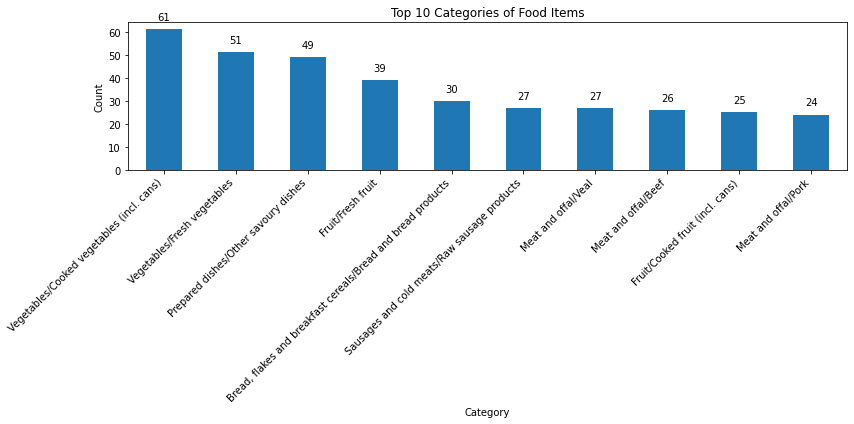

In [14]:
import matplotlib.pyplot as plt

# Get the top 10 categories by frequency
top_categories = food_nutrition['Category'].value_counts().nlargest(10)

# Plot the distribution of food items for the top 10 categories
plt.figure(figsize=(12, 6))  # Adjust the figure size
bars = top_categories.plot(kind='bar')
plt.title('Top 10 Categories of Food Items')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate the labels and align them to the right

# Add count labels on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.05 * max(top_categories), 
             f'{int(bar.get_height())}', 
             ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


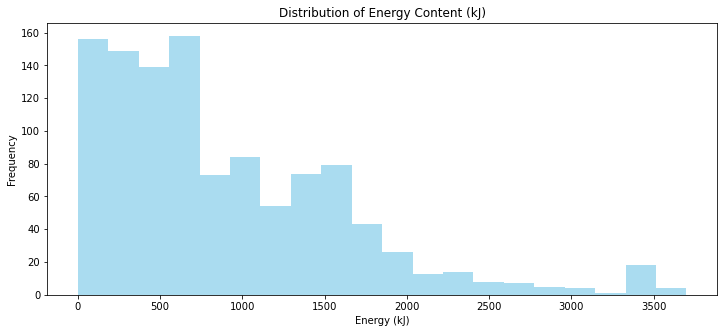

In [15]:
plt.figure(figsize=(12, 5))
plt.hist(food_nutrition_cleaned['Energy, kilojoules (kJ)'], bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Energy Content (kJ)')
plt.xlabel('Energy (kJ)')
plt.ylabel('Frequency')
plt.show()


Text(0, 0.5, 'Frequency')

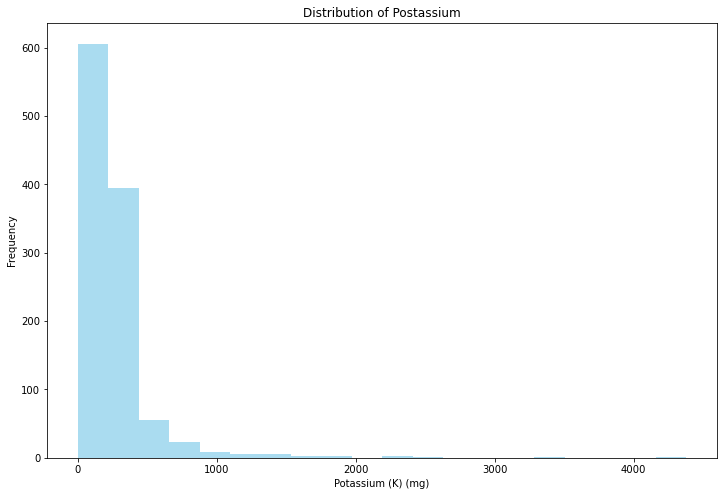

In [16]:
plt.figure(figsize = (12,8))
plt.hist(food_nutrition_cleaned['Potassium (K) (mg)'], bins = 20, color = 'Skyblue', alpha = 0.7)
plt.title('Distribution of Postassium')
plt.xlabel('Potassium (K) (mg)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

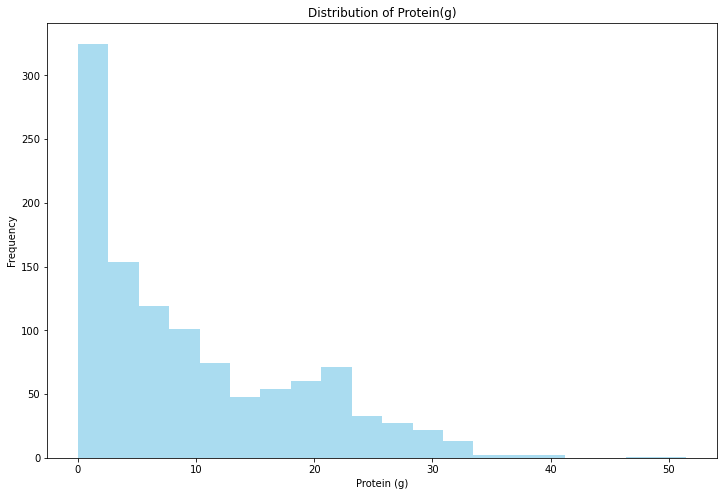

In [17]:
plt.figure(figsize = (12,8))
plt.hist(food_nutrition_cleaned['Protein (g)'], bins = 20, color = 'Skyblue', alpha = 0.7)
plt.title('Distribution of Protein(g)')
plt.xlabel('Protein (g)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

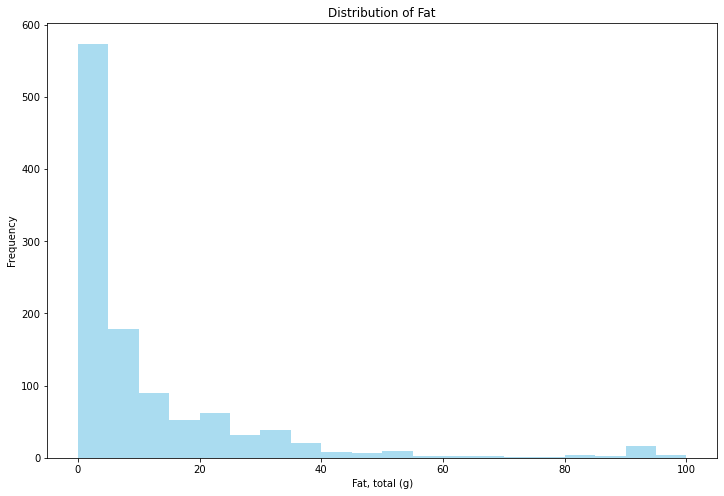

In [18]:
plt.figure(figsize = (12,8))
plt.hist(food_nutrition_cleaned['Fat, total (g)'], bins = 20, color = 'Skyblue', alpha = 0.7)
plt.title('Distribution of Fat')
plt.xlabel('Fat, total (g)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

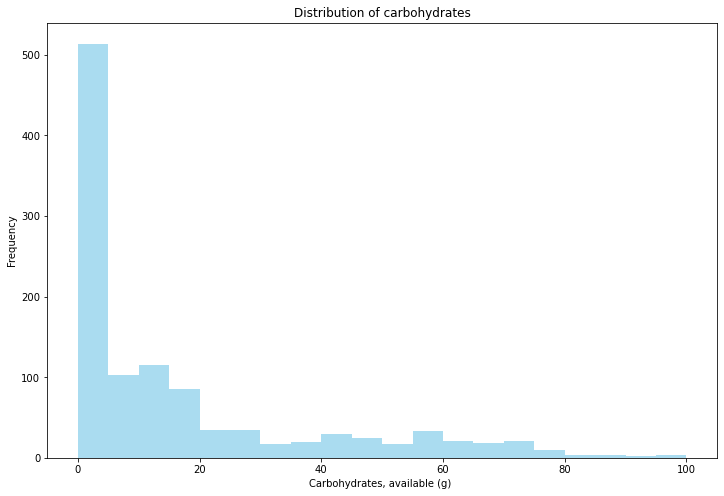

In [19]:
plt.figure(figsize = (12,8))
plt.hist(food_nutrition_cleaned['Carbohydrates, available (g)'], bins = 20, color = 'Skyblue', alpha = 0.7)
plt.title('Distribution of carbohydrates')
plt.xlabel('Carbohydrates, available (g) ')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

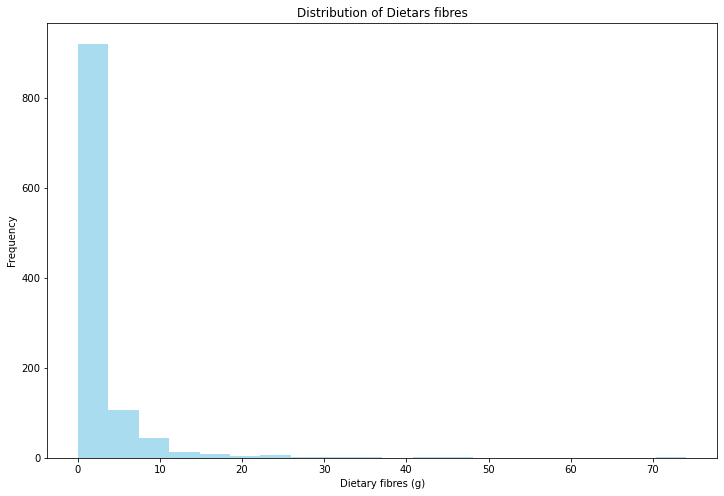

In [20]:
plt.figure(figsize = (12,8))
plt.hist(food_nutrition_cleaned['Dietary fibres (g)'], bins = 20, color = 'Skyblue', alpha = 0.7)
plt.title('Distribution of Dietars fibres')
plt.xlabel('Dietary fibres (g)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

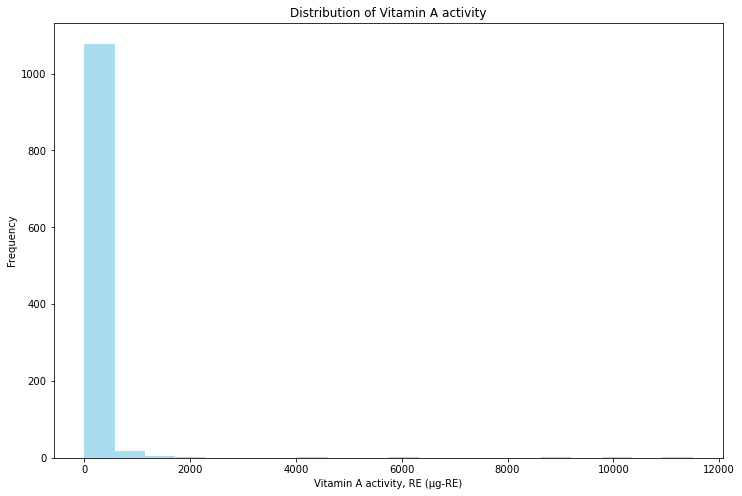

In [21]:
plt.figure(figsize = (12,8))
plt.hist(food_nutrition_cleaned['Vitamin A activity, RE (µg-RE)'], bins = 20, color = 'Skyblue', alpha = 0.7)
plt.title('Distribution of Vitamin A activity')
plt.xlabel('Vitamin A activity, RE (µg-RE)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

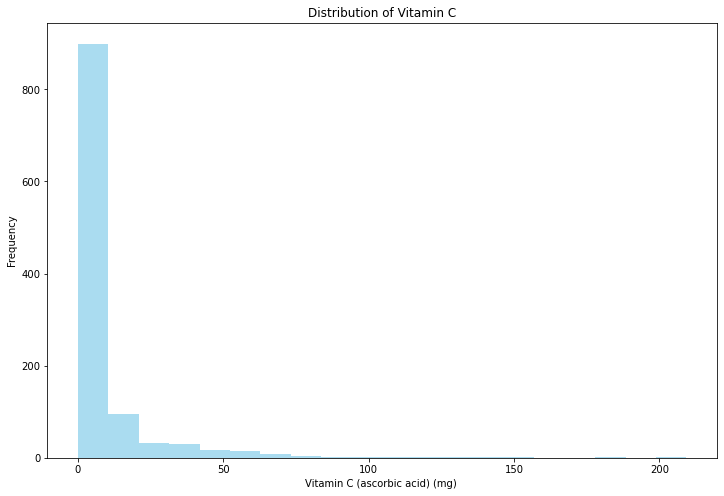

In [22]:
plt.figure(figsize = (12,8))
plt.hist(food_nutrition_cleaned['Vitamin C (ascorbic acid) (mg)'], bins = 20, color = 'Skyblue', alpha = 0.7)
plt.title('Distribution of Vitamin C')
plt.xlabel('Vitamin C (ascorbic acid) (mg) ')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

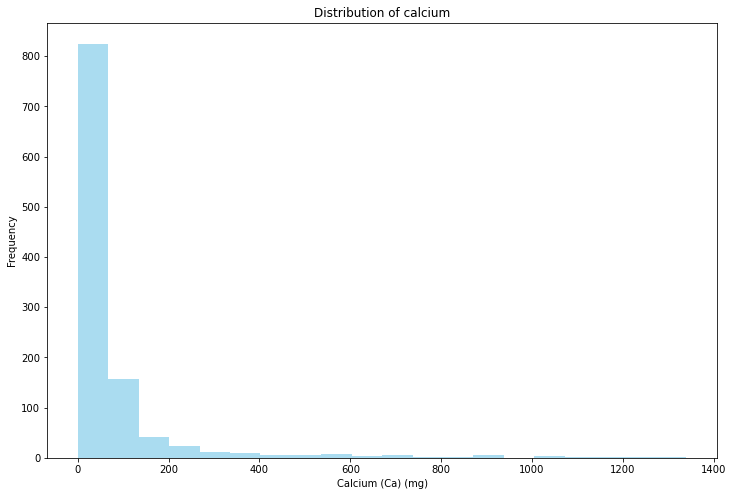

In [23]:
plt.figure(figsize = (12,8))
plt.hist(food_nutrition_cleaned['Calcium (Ca) (mg)'], bins = 20, color = 'Skyblue', alpha = 0.7)
plt.title('Distribution of calcium')
plt.xlabel('Calcium (Ca) (mg)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

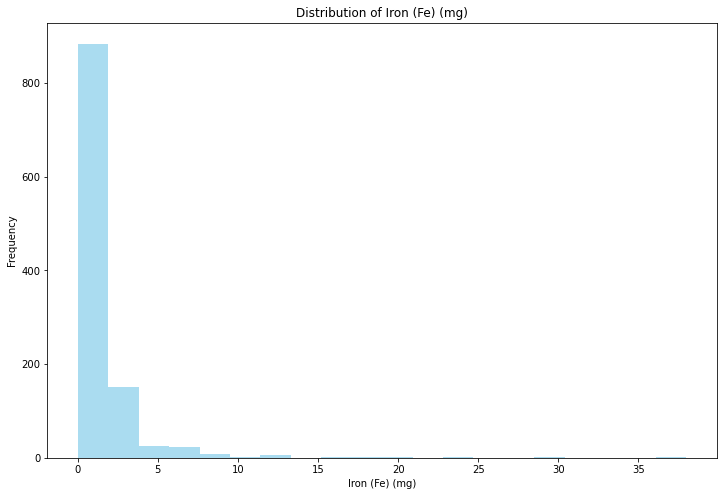

In [24]:
plt.figure(figsize = (12,8))
plt.hist(food_nutrition_cleaned['Iron (Fe) (mg)'], bins = 20, color = 'Skyblue', alpha = 0.7)
plt.title('Distribution of Iron (Fe) (mg)')
plt.xlabel('Iron (Fe) (mg)')
plt.ylabel('Frequency')

In [61]:

file_url = 'https://raw.githubusercontent.com/liyengL/DietNutrition/main/Mydiet_weekly.csv'

mydiet = pd.read_csv(file_url)

print(mydiet.head())

                                                Food  Weight  Weight_by_100
0                                Almond drink, plain     500            5.0
1                                       Apple, fresh     200            2.0
2                   Beef ragout with sauce, prepared     500            5.0
3  Beef, entrcôte, steak, pan fried "medium" (wit...     200            2.0
4                                        Beer, lager     330            3.3


In [62]:
mydiet

,Food,Weight,Weight_by_100
0,"Almond drink, plain",500,5.0
1,"Apple, fresh",200,2.0
2,"Beef ragout with sauce, prepared",500,5.0
3,"Beef, entrcôte, steak, pan fried ""medium"" (wit...",200,2.0
4,"Beer, lager",330,3.3
5,"Bell pepper, red, stewed (without addition of ...",50,0.5
6,"Bread for toasting, white, made with butter",100,1.0
7,"Butter croissant, white",50,0.5
8,"Broccoli, steamed (without addition of salt)",200,2.0
9,"Carrot, steamed (without addition of salt)",250,2.5


In [63]:
# Merge the two datasets based on the food names
merged_df = pd.merge(mydiet, food_nutrition_cleaned, left_on='Food', right_on='Name', how='left')

# Select the columns representing the 10 selected nutrients
selected_nutrients = ['Energy, kilojoules (kJ)', 'Energy, kilocalories (kcal)', 'Fat, total (g)', 
                      'Protein (g)', 'Carbohydrates, available (g)', 'Dietary fibres (g)', 
                      'Vitamin A activity, RE (µg-RE)', 'Vitamin C (ascorbic acid) (mg)', 
                      'Calcium (Ca) (mg)', 'Iron (Fe) (mg)']

# Calculate the total nutrient content for each food item in your weekly diet
for nutrient in selected_nutrients:
    merged_df[nutrient + '_total'] = merged_df[nutrient] * merged_df['Weight_by_100']

# Group by and sum the nutrient content for each nutrient
total_nutrient_content = merged_df[[nutrient + '_total' for nutrient in selected_nutrients]].sum()

print("Total nutrient content for your weekly diet:")
print(total_nutrient_content)


Total nutrient content for your weekly diet:
Energy, kilojoules (kJ)_total           51977.20
Energy, kilocalories (kcal)_total       12401.20
Fat, total (g)_total                      539.31
Protein (g)_total                         631.78
Carbohydrates, available (g)_total       1160.24
Dietary fibres (g)_total                  145.66
Vitamin A activity, RE (µg-RE)_total    10015.30
Vitamin C (ascorbic acid) (mg)_total      661.60
Calcium (Ca) (mg)_total                  3669.70
Iron (Fe) (mg)_total                       99.84
dtype: float64


In [64]:
recommended_intake = {
    'Protein (g)_total':46,
    'Energy, kilocalories (kcal)_total':2000,
    'Energy, kilojoules (kJ)_total':8000,
    'Fat, total (g)_total':20,
    'Chloride (Cl)': 2300,  # mg/day
    'Calcium (Ca) (mg)_total': 1000,   # mg/day
    'Magnesium (Mg)_female': (310, 320),  # mg/day for females
    'Carbohydrates, available (g)_total':250,
    'Vitamin A activity, RE (µg-RE)_total':700,
    'Dietary fibres (g)_total':25,
    'Vitamin C (ascorbic acid) (mg)_total':75,
    'Iron (Fe) (mg)_total': 50,       # µg/day
}

# Define the number of days in a week
days_in_week = 7

# Calculate the recommended weekly intake for each nutrient
recommended_weekly_intake = {}
for nutrient, value in recommended_intake.items():
    if isinstance(value, tuple):  
        male_value, female_value = value
        recommended_weekly_intake[nutrient] = (male_value * days_in_week, female_value * days_in_week)
    else:
        recommended_weekly_intake[nutrient] = value * days_in_week

print("Recommended Weekly Intake for Each Nutrient:")
for nutrient, value in recommended_weekly_intake.items():
    print(f"{nutrient}: {value}")

Recommended Weekly Intake for Each Nutrient:
Protein (g)_total: 322
Energy, kilocalories (kcal)_total: 14000
Energy, kilojoules (kJ)_total: 56000
Fat, total (g)_total: 140
Chloride (Cl): 16100
Calcium (Ca) (mg)_total: 7000
Magnesium (Mg)_female: (2170, 2240)
Carbohydrates, available (g)_total: 1750
Vitamin A activity, RE (µg-RE)_total: 4900
Dietary fibres (g)_total: 175
Vitamin C (ascorbic acid) (mg)_total: 525
Iron (Fe) (mg)_total: 350


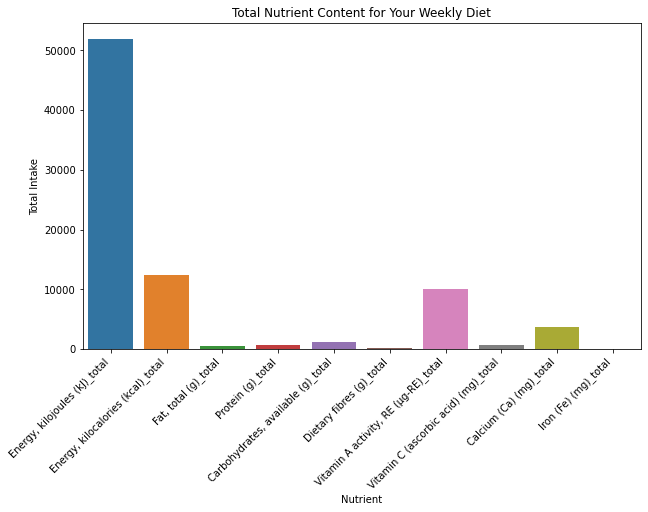

In [65]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=total_nutrient_content.index, y=total_nutrient_content.values)
plt.title('Total Nutrient Content for Your Weekly Diet')
plt.xlabel('Nutrient')
plt.ylabel('Total Intake')
plt.xticks(rotation=45, ha='right') 
plt.show()

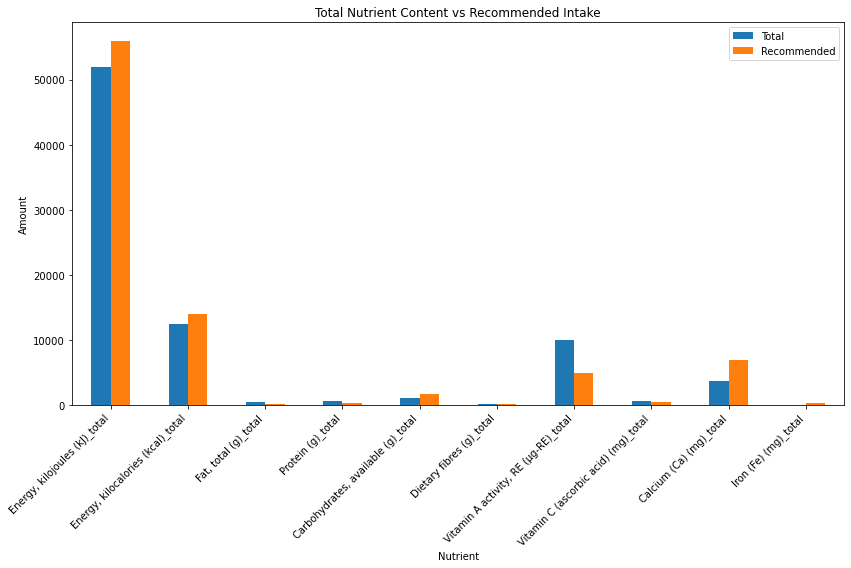

In [66]:
import matplotlib.pyplot as plt

total_nutrient_content_df = pd.DataFrame(total_nutrient_content, columns=['Total'])
total_nutrient_content_df['Recommended'] = [recommended_weekly_intake[nutrient] for nutrient in total_nutrient_content_df.index]

# Plotting
total_nutrient_content_df.plot(kind='bar', figsize=(12, 8))
plt.title('Total Nutrient Content vs Recommended Intake')
plt.ylabel('Amount')
plt.xlabel('Nutrient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [69]:
print("Total Nutrient Content:")
print(total_nutrient_content_df)

print("\nRecommended Intake:")
for nutrient, value in recommended_weekly_intake.items():
    print(f"{nutrient}: {value}")



Total Nutrient Content:
                                         Total  Recommended
Energy, kilojoules (kJ)_total         51977.20        56000
Energy, kilocalories (kcal)_total     12401.20        14000
Fat, total (g)_total                    539.31          140
Protein (g)_total                       631.78          322
Carbohydrates, available (g)_total     1160.24         1750
Dietary fibres (g)_total                145.66          175
Vitamin A activity, RE (µg-RE)_total  10015.30         4900
Vitamin C (ascorbic acid) (mg)_total    661.60          525
Calcium (Ca) (mg)_total                3669.70         7000
Iron (Fe) (mg)_total                     99.84          350

Recommended Intake:
Protein (g)_total: 322
Energy, kilocalories (kcal)_total: 14000
Energy, kilojoules (kJ)_total: 56000
Fat, total (g)_total: 140
Chloride (Cl): 16100
Calcium (Ca) (mg)_total: 7000
Magnesium (Mg)_female: (2170, 2240)
Carbohydrates, available (g)_total: 1750
Vitamin A activity, RE (µg-RE)_total: 49